Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
from zipfile import ZipFile 
# specifying the zip file name 
file_name = ["../data/amazon_deforestation_2008_2018.zip"]
  
# opening the zip file in READ mode 
for file in file_name:
    with ZipFile(file, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!')

File Name                                             Modified             Size
amazon_deforestation_2008_2018.csv             2020-04-22 23:06:04     60414639
Extracting all the files now...
Done!


In [4]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
df_amazon_deforestation = pd.read_csv('amazon_deforestation_2008_2018.csv')

In [59]:
import pandas_profiling
pandas_profiling.__version__

'2.5.0'

In [61]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_amazon_deforestation, minimal=True).to_notebook_iframe()
profile

In [234]:
df_amazon_deforestation.drop(columns='Unnamed: 0', inplace=True)
df_amazon_deforestation.head()

,gid,origin_id,uf,pathrow,mainclass,class_name,dsfnv,julday,view_date,ano,areakm,scene_id,publish_ye
0,790933,14.0,RR,157,DESMATAMENTO,d2018,2017.0,203.0,2018-07-22,2018.0,0.016815,101255.0,2018-01-01 00:00:00
1,790938,19.0,PA,22661,DESMATAMENTO,d2018,NaN,227.0,2018-08-15,2018.0,0.182198,101212.0,2018-01-01 00:00:00
2,790968,48.0,PA,22661,DESMATAMENTO,d2018,NaN,227.0,2018-08-15,2018.0,0.004798,101212.0,2018-01-01 00:00:00
3,790983,62.0,PA,22661,DESMATAMENTO,d2018,2017.0,227.0,2018-08-15,2018.0,0.073174,101212.0,2018-01-01 00:00:00
4,790984,63.0,PA,22661,DESMATAMENTO,d2018,2017.0,227.0,2018-08-15,2018.0,0.000375,101212.0,2018-01-01 00:00:00


In [235]:
df_amazon_deforestation.isnull().sum()

gid              0
origin_id        0
uf               0
pathrow          0
mainclass        0
class_name       0
dsfnv         4108
julday           0
view_date        0
ano              0
areakm           0
scene_id         0
publish_ye       0
dtype: int64

In [236]:
df_amazon_deforestation['areakm'].describe()

count    474930.000000
mean          0.155921
std           0.428152
min           0.000000
25%           0.065115
50%           0.089441
75%           0.146672
max          53.771960
Name: areakm, dtype: float64

In [237]:
# column trying to predict
y = df_amazon_deforestation['areakm']
y

0         0.016815
1         0.182198
2         0.004798
3         0.073174
4         0.000375
            ...   
474925    0.166878
474926    0.127529
474927    0.112783
474928    0.319061
474929    0.229661
Name: areakm, Length: 474930, dtype: float64

In [238]:
y.describe()

count    474930.000000
mean          0.155921
std           0.428152
min           0.000000
25%           0.065115
50%           0.089441
75%           0.146672
max          53.771960
Name: areakm, dtype: float64

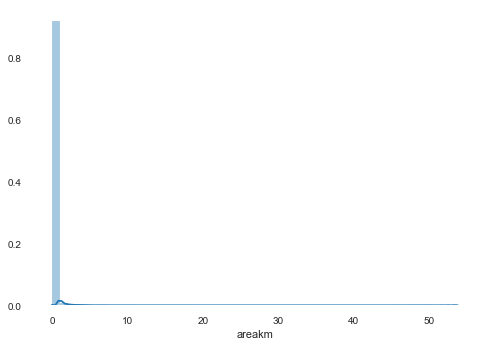

In [239]:
#very right skewed
import seaborn as sns
sns.distplot(y);

In [240]:
# feature engineering

def clean_up(X):
    X = X.copy()
    
 # get the month, year, and day
    X['day'] = pd.to_datetime(X['view_date']).dt.day
    X['month'] = pd.to_datetime(X['view_date']).dt.month
    X['year'] = pd.to_datetime(X['view_date']).dt.year
    
    # get rid of zeros
    cols_with_zeros = ['scene_id', 'dsfnv']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    
    # convert squared km to squared meters
    X['area_meters_squared'] = X['areakm'] / 0.0000010000
    
    # convert states abbreviations to full names
    X['states'] = X['uf'].replace({'PA': 'Para', 'MT': 'Mato Grosso', 'RO': 'Rondonia', 'AM': 'Amazonas',
                               'MA': 'Maranhao', 'AC': 'Acre', 'RR': 'Roraima',
                              'AP': 'Amapa', 'TO': 'Tocantins'})

    return X

In [241]:
cleaned_df_amazon_deforestation = clean_up(df_amazon_deforestation)

In [242]:
cleaned_df_amazon_deforestation.head(3)

,gid,origin_id,uf,pathrow,mainclass,class_name,dsfnv,julday,view_date,ano,areakm,scene_id,publish_ye,day,month,year,area_meters_squared,states
0,790933,14.0,RR,157,DESMATAMENTO,d2018,2017.0,203.0,2018-07-22,2018.0,0.016815,101255.0,2018-01-01 00:00:00,22,7,2018,16815.333506,Roraima
1,790938,19.0,PA,22661,DESMATAMENTO,d2018,NaN,227.0,2018-08-15,2018.0,0.182198,101212.0,2018-01-01 00:00:00,15,8,2018,182198.351435,Para
2,790968,48.0,PA,22661,DESMATAMENTO,d2018,NaN,227.0,2018-08-15,2018.0,0.004798,101212.0,2018-01-01 00:00:00,15,8,2018,4798.222637,Para


In [243]:
# redefine column trying to predict
y = cleaned_df_amazon_deforestation['area_meters_squared']

In [244]:
y.describe().apply(lambda x: format(x, 'f'))

count      474930.000000
mean       155920.563152
std        428151.573383
min             0.000000
25%         65115.434492
50%         89440.682297
75%        146671.522799
max      53771959.781482
Name: area_meters_squared, dtype: object

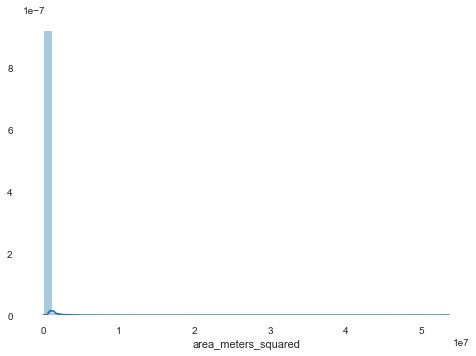

In [245]:
sns.distplot(y);

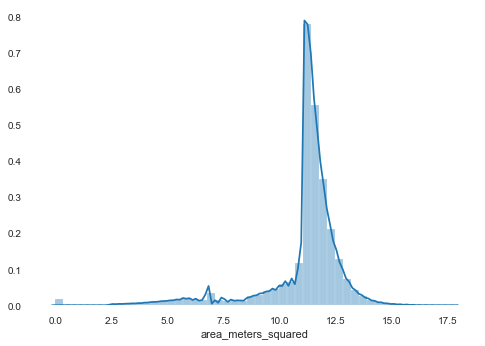

In [211]:
y_log = np.log1p(y)
sns.distplot(y_log);

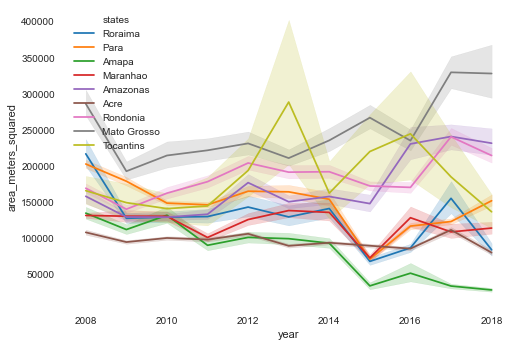

In [246]:
# visualize the data by year
sns.lineplot(x="year", y="area_meters_squared",
             hue="states",
             data=cleaned_df_amazon_deforestation);

In [247]:
cleaned_df_amazon_deforestation['year'].value_counts()

2015    73039
2008    68166
2010    43123
2018    41524
2017    41261
2009    39503
2016    39215
2011    38478
2013    32514
2014    31798
2012    26309
Name: year, dtype: int64

In [248]:
# train/val/test time-based split data
train = cleaned_df_amazon_deforestation[cleaned_df_amazon_deforestation['year'] <= 2015]
val = cleaned_df_amazon_deforestation[cleaned_df_amazon_deforestation['year'] == 2016]
test = cleaned_df_amazon_deforestation[cleaned_df_amazon_deforestation['year'] >= 2017]

train.shape, val.shape, test.shape

((352930, 18), (39215, 18), (82785, 18))

In [249]:
# define target
target = 'area_meters_squared'

useless= ['gid', 'origin_id', 'mainclass', 'class_name']
duplicates = ['ano', 'uf', 'julday', 'view_date', 'publish_ye']
leakage = ['areakm'] 

# define features
features = train.drop(columns=[target] + useless + duplicates).columns.tolist()
features

['pathrow', 'dsfnv', 'areakm', 'scene_id', 'day', 'month', 'year', 'states']

In [250]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [251]:
# choose metrics MAE (because leaving some outliers)
from sklearn.metrics import mean_absolute_error

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [252]:
# Random forest
rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

k = 5
scores = cross_val_score(rf, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 5 folds: [1696.07074145   13.94365408   52.89737161   36.82217528  157.85492394]


In [253]:
# Data is right-skewed large MAE
print(f'MAE on skewed data: {-scores.mean():.4f} meters squared')

MAE on skewed data: 391.5178 meters squared


In [254]:
# use log transform because the data is right-skewed
y_train_log = np.log1p(y_train)
rf.fit(X_train, y_train_log)
y_pred_log = rf.predict(X_val)
y_pred = np.expm1(y_pred_log)

In [255]:
print(f'MAE with log transform: {mean_absolute_error(y_val, y_pred):.4f} meters squared')

MAE with log transform: 58.7780 meters squared
